<a href="https://colab.research.google.com/github/Matvezy/Autoencoder/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matvei Popov, Auto-encoder with multiple layers for Google Code in 
I am going to process the images from cifar10 datset, which is included in keras library, they are colored which makes the algorithm a bit more comlex, it is easier for me, cause I don not have to worry about uploading datasets in colab, and it also looks better than gray and white pictures :) 

I am going to use multiple layers convolutional neural network, lets get started.

# Imports: 

In [0]:
from keras.models import load_model, Model
from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

Initializing the parametrs

In [0]:
batch_size = 256
epochs = 100

Uploading and initializing dataset

In [120]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
print("Train shape:", x_train.shape)
# Got 50000 images in train dataset, with 32x32 in size

Train shape: (50000, 32, 32, 3)


Dividing data into validation and test datasets

In [0]:
x_validation = x_test[:5000]
x_test = x_test[5000:]

Defining the encoder network layers

In [0]:
input_img = Input(shape=(32, 32, 3)) #input
x = Conv2D(64, (3, 3), padding='same', activation='relu')(input_img)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
encoded = MaxPooling2D((2, 2), padding='same')(x) #we have reached the bottleneck layer


Defining decoder network layers

In [0]:
input_encoded = Input(shape=(3, 3, 8))
x = Conv2D(8, (3, 3), padding='same', activation='relu')(input_encoded)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(3, (3, 3), padding='same', activation='sigmoid')(x)
decoded = BatchNormalization()(x) #we got input back

Initializing encoder, decoder and autoencoder models

In [124]:
encoder= Model(input_img, encoded, name="encoder")
decoder = Model(input_encoded, decoded, name="decoder")
autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
#should use mean_squared_error because there are 256 color values, so nums are in interval between 0 and 255
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
#summary for the whole autoencoder network
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
encoder (Model)              (None, 2, 2, 8)           26520     
_________________________________________________________________
decoder (Model)              multiple                  27111     
Total params: 53,631
Trainable params: 53,145
Non-trainable params: 486
_________________________________________________________________


Train network

In [125]:
autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                verbose=1,
                validation_data=(x_validation, x_validation),
                use_multiprocessing=True
                )

Train on 50000 samples, validate on 5000 samples
Epoch 1/100
50000/50000 [==============================] - 12s 237us/step - loss: 0.5193 - val_loss: 0.1861
Epoch 2/100
50000/50000 [==============================] - 6s 122us/step - loss: 0.1002 - val_loss: 0.0589
Epoch 3/100
50000/50000 [==============================] - 6s 122us/step - loss: 0.0543 - val_loss: 0.0395
Epoch 4/100
50000/50000 [==============================] - 6s 120us/step - loss: 0.0398 - val_loss: 0.0550
Epoch 5/100
50000/50000 [==============================] - 6s 120us/step - loss: 0.0367 - val_loss: 0.0552
Epoch 6/100
50000/50000 [==============================] - 6s 121us/step - loss: 0.0332 - val_loss: 0.0557
Epoch 7/100
50000/50000 [==============================] - 6s 123us/step - loss: 0.0326 - val_loss: 0.0906
Epoch 8/100
50000/50000 [==============================] - 6s 126us/step - loss: 0.0306 - val_loss: 0.0715
Epoch 9/100
50000/50000 [==============================] - 6s 122us/step - loss: 0.0295 - val_

Calculating the score for autoencoder, test, validate (I definetly did not get the best ones)

In [126]:
score = autoencoder.evaluate(x_test, x_test)
print(score)
test = autoencoder.predict(x_test)
validate = autoencoder.predict(x_validation)
print("Test:",np.average(test), "Validate:", np.average(validate))

5000/5000 [==============================] - 1s 131us/step
0.014310729026794434
Test: 0.47332352 Validate: 0.47948217


Displaying the result for test datset

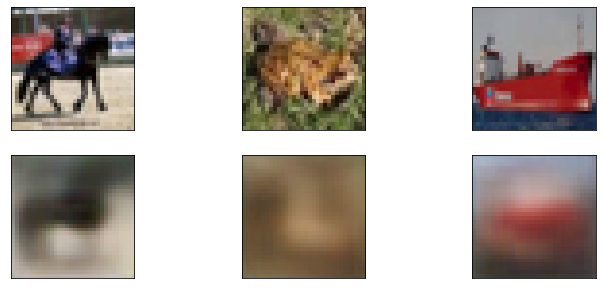

In [147]:
plt.figure(figsize=(20, 5))
for i in range(0,3):
  # display original data
  ax = plt.subplot(2, 5, i+1)
  plt.imshow(x_test[i].reshape(32, 32, 3))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display encode-decode data
  ax = plt.subplot(2, 5, i +1 + 5)
  plt.imshow(test[i].reshape(32, 32, 3))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

Displaying the result for validate dataset

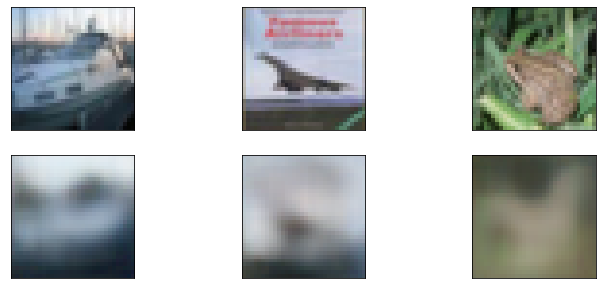

In [145]:
plt.figure(figsize=(20, 5))
for i in range(2,5):
  ax = plt.subplot(2, 5, i+1)
  plt.imshow(x_validation[i].reshape(32, 32, 3))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, 5, i +1 + 5)
  plt.imshow(validate[i].reshape(32, 32, 3))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

# Overall, I did  not get the best result, I am confused about where I could have made a mistake but right now autoencoder poorly does its job.